# Boosting

## Adaboost

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score

In [2]:
# データのロード
df = sns.load_dataset('titanic')
df.dropna(inplace=True)


# x, yの準備
X = df.loc[:, (df.columns != 'survived') & (df.columns != 'alive')]
y = df['survived']


# ラベルエンコーディング
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()


# defaultはnp.arrayで返るので、pdで返るようにする
oe.set_output(transform='pandas')


# カテゴリカルデータの選択 => label encoding
cat_cols = X.select_dtypes(exclude=np.number).columns.to_numpy()
X.loc[:, cat_cols] = oe.fit_transform(X[cat_cols])
# X = oe.fit_transform(X)


# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.01, random_state=0).fit(X_train, y_train)
y_pred_ada = ada.predict_proba(X_test)
print(f"adaboost AUC: {roc_auc_score(y_test, y_pred_ada[:, 1])}")

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


adaboost AUC: 0.9375


<BarContainer object of 13 artists>

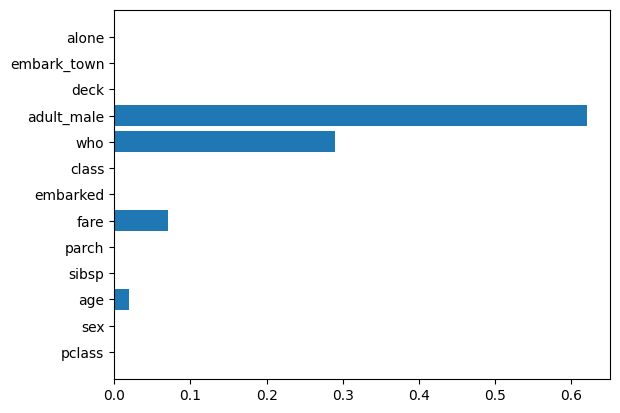

In [18]:
# 重要度の描画
plt.barh(X.columns, ada.feature_importances_)

Random Forestと異なり、特徴量の選出がないので同じような特徴量で分割をしている。　<br>
※ max-depthが１というのもある。